_**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

In [1]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">Parking Availability</div>

<div class="usecase-authors"><b>Authored by: </b> Angie Hollingworth, Siju Deng</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, and add any more skills needed}</div>
</div>

<div class="usecase-section-header">Scenario</div>

{Using User Story format, write a description of the problem you are trying to solve for this use case.}

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- {list the skills demonstrated in your use case}

<div class="usecase-section-header">{Heading for introduction or background relating to problem}</div>

{Write your introduction here. Keep it concise. We're not after "War and Peace" but enough background information to inform the reader on the rationale for solving this problem or background non-technical information that helps explain the approach. You may also wish to give information on the datasets, particularly how to source those not being imported from the client's open data portal.}



***

_**DELETE BEFORE PUBLISHING**_

## Style guide for use cases

### Headers

For styling within your markdown cells, there are two choices you can use for headers.

1) You can use HTML classes specific to the use case styling:

```<p class="usecase-subsection-header">This is a subsection header.</p>```

<p style="font-weight: bold; font-size: 1.2em;">This is a subsection header.</p>

```<p class="usecase-subsection-blurb">This is a blurb header.</p>```

<p style="font-weight: bold; font-size: 1em; font-style:italic;">This is a blurb header.</p>


2) Or if you like you can use the markdown header styles:

```# for h1```

```## for h2```

```### for h3```

```#### for h4```

```##### for h5```

## Plot colour schemes

General advice:
1. Use the same colour or colour palette throughout your notebook, unless variety is necessary
2. Select a palette based on the type of data being represented
3. Consider accessibility (colourblindness, low vision)

#### 1) If all of your plots only use 1-2 colors use one of the company style colors:

| Light theme | Dark Theme |
|-----|-----|
|<p style="color:#2af598;">#2af598</p>|<p style="color:#08af64;">#08af64</p>|
|<p style="color:#22e4ac;">#22e4ac</p>|<p style="color:#14a38e;">#14a38e</p>|
|<p style="color:#1bd7bb;">#1bd7bb</p>|<p style="color:#0f9295;">#0f9295</p>|
|<p style="color:#14c9cb;">#14c9cb</p>|<p style="color:#056b8a;">#056b8a</p>|
|<p style="color:#0fbed8;">#0fbed8</p>|<p style="color:#121212;">#121212</p>|
|<p style="color:#08b3e5;">#08b3e5</p>||


#### 2) If your plot needs multiple colors, choose an appropriate palette using either of the following tutorials:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

#### 3) Consider accessibility as well.

For qualitative plotting Seaborn's 'colorblind' palette is recommended. For maps with sequential or diverging it is recommended to use one of the Color Brewer schemes which can be previewed at https://colorbrewer2.org/.

If you want to design your own colour scheme, it should use the same principles as Cynthia Brewer's research (with variation not only in hue but also, saturation or luminance).

### References

Be sure to acknowledge your sources and any attributions using links or a reference list.

If you have quite a few references, you might wish to have a dedicated section for references at the end of your document, linked using footnote style numbers.

You can connect your in-text reference by adding the number with a HTML link: ```<a href="#fn-1">[1]</a>```

and add a matching ID in the reference list using the ```<fn>``` tag: ```<fn id="fn-1">[1] Author (Year) _Title_, Publisher, Publication location.</fn>```

### new

In [75]:
import requests
import pandas as pd

def fetch_parking_data(base_url, dataset, api_key, num_records=100):
    all_records = []
    offset = 0
    while True:
        filters = f'{dataset}/records?limit={num_records}&offset={offset}'
        url = f'{base_url}{filters}&{api_key}'
        result = requests.get(url)
        if result.status_code != 200:
            raise Exception(f"API request failed with status code {result.status_code}")
        records = result.json().get('results')
        if records is None:
            break
        all_records.extend(records)
        if len(records) < num_records:
            break
        offset += num_records
    df = pd.DataFrame(all_records)
    return df

BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
SENSOR_DATASET = 'on-street-parking-bay-sensors'
API_KEY = '558000cd83c1d1ba8c4a5e09e0063424750542b70b132293e63b645a'
df = fetch_parking_data(BASE_URL, SENSOR_DATASET, API_KEY)

df['location_lat'] = df['location'].apply(lambda x: x['lat'])
df['location_lon'] = df['location'].apply(lambda x: x['lon'])
df.drop(columns=['location'], inplace=True)

# Display the DataFrame
print(df.head())


                 lastupdated           status_timestamp  zone_number  \
0  2023-07-20T05:44:36+00:00  2023-07-19T21:24:38+00:00       7358.0   
1  2023-07-20T05:44:36+00:00  2023-07-20T05:23:46+00:00       7358.0   
2  2023-07-20T05:44:36+00:00  2023-07-20T04:46:01+00:00       7358.0   
3  2023-07-24T06:44:36+00:00  2023-07-24T06:16:08+00:00       7638.0   
4  2023-07-24T06:44:36+00:00  2023-07-24T05:50:20+00:00       7638.0   

  status_description  parkingbay_id  location_lat  location_lon  
0         Unoccupied           7075    -37.814591    144.969350  
1            Present           7076    -37.814569    144.969424  
2         Unoccupied           7077    -37.814547    144.969500  
3         Unoccupied           5852    -37.813205    144.968283  
4         Unoccupied           5874    -37.813361    144.968354  


### old

In [13]:
# import pandas as pd
# from sodapy import Socrata

# # find the parking dataset @ https://data.melbourne.vic.gov.au/Transport/On-street-Parking-Bay-Sensors/vh2v-4nfs
# parking_dataset_id = 'vh2v-4nfs'
# # app tokens are just used to manage throttling (not authentication)
# app_token = '[your app token]' #find out about app tokens @ https://dev.socrata.com/docs/app-tokens.html
# bucket = 'opendataplayground.deakin'

# # Access open data through Socrata client
# client = Socrata(
#     "data.melbourne.vic.gov.au",
#     app_token,
#     timeout=120
# )

# # read snapshot of parking sensors status
# api_results = client.get_all(parking_dataset_id)
# parking_sensors = pd.DataFrame.from_dict(api_results)
# parking_sensors = parking_sensors.astype({'lat':'float64', 'lon':'float64'})
# # remove duplicates found in the parking sensor data
# parking_sensors = parking_sensors.drop_duplicates()
# parking_sensors[['lat', 'lon', 'status']].to_json('./latest_parking_sensors.json')


#### Function to get full dataset

### new

In [76]:
def validate_data(df):
    print("\nChecking for NaN values:")
    print(df.isna().sum())
    print("\nChecking for Duplicates:")
    print(df.duplicated().sum())
    print("\nChecking data types:")
    print(df.dtypes)

validate_data(df)


Checking for NaN values:
lastupdated             0
status_timestamp        0
zone_number           399
status_description      0
parkingbay_id           0
location_lat            0
location_lon            0
dtype: int64

Checking for Duplicates:
0

Checking data types:
lastupdated            object
status_timestamp       object
zone_number           float64
status_description     object
parkingbay_id           int64
location_lat          float64
location_lon          float64
dtype: object


In [77]:
# Convert 'lastupdated' and 'status_timestamp' to datetime objects
df['lastupdated'] = pd.to_datetime(df['lastupdated'])
df['status_timestamp'] = pd.to_datetime(df['status_timestamp'])

# Identify the most recent timestamp
latest_timestamp = df['status_timestamp'].max()

# Calculate the date one year ago from the most recent timestamp
one_year_ago = latest_timestamp - pd.DateOffset(years=1)

# Identify rows with 'status_timestamp' older than one year
outdated_rows = df[df['status_timestamp'] < one_year_ago]

# Print these outdated rows, sorted by 'status_timestamp'
print("Outdated rows:")
print(outdated_rows.sort_values(by='status_timestamp').head())

# Print the data header sorted by 'status_timestamp'
print("\nData header sorted by time:")
print(df.sort_values(by='status_timestamp').head())

# Delete outdated rows
df = df[df['status_timestamp'] >= one_year_ago]



Outdated rows:
                   lastupdated          status_timestamp  zone_number  \
4587 2023-09-03 07:54:36+00:00 1970-01-01 00:00:00+00:00       7112.0   
2043 2023-09-03 07:54:36+00:00 2022-07-27 23:03:14+00:00       7062.0   
4999 2023-09-03 07:54:36+00:00 2022-08-02 08:41:19+00:00          NaN   

     status_description  parkingbay_id  location_lat  location_lon  
4587         Unoccupied          23650    -37.801596    144.969723  
2043         Unoccupied          21358    -37.803218    144.962660  
4999         Unoccupied          24999    -37.809305    144.974109  

Data header sorted by time:
                   lastupdated          status_timestamp  zone_number  \
4587 2023-09-03 07:54:36+00:00 1970-01-01 00:00:00+00:00       7112.0   
2043 2023-09-03 07:54:36+00:00 2022-07-27 23:03:14+00:00       7062.0   
4999 2023-09-03 07:54:36+00:00 2022-08-02 08:41:19+00:00          NaN   
4717 2023-09-03 07:54:36+00:00 2022-09-13 04:38:23+00:00       7247.0   
674  2023-09-03 07:54:

In [18]:
##OLD outline
# from datetime import datetime
# from os.path import isfile

# # fetch the latest parkign data and append to parking sensor file collection
# def update_latest_parking_data():
#     # connect to melbourne open data apis
#     client = Socrata(
#         "data.melbourne.vic.gov.au",
#         "EC65cHicC3xqFXHHvAUICVXEr", # app token, just used to reduce throttling, not authentication
#         timeout=120
#     )

#     # add another number to the csv
#     df = pd.DataFrame(client.get("vh2v-4nfs", limit=200000))
#     df.drop(columns = ['location', 'lat', 'lon', ':@computed_region_evbi_jbp8'], inplace = True)
#     df['datetime'] = datetime.today().replace(microsecond=0) + datetime.timedelta(hours = 10) #Melbourne Time

#     # if file already exists than we just want to append to the file
#     # else we want to write a new file
#     write_mode = 'w' if isfile('parking_sensor_data.csv') else 'a'

#     df.to_csv('parking_sensor_data.csv', mode=write_mode, index = False)

# import time

# # simply press keys `ctrl + c` to stop the loop
# try:
#     while True:
#         update_latest_parking_data()
#         # wait for 15 minutes before fetching next latest
#         time.sleep(15*60)
# except KeyboardInterrupt:
#     print('Finished fetching parking data.')


### Try to analyze the data directly

### doesn't seem to be available, try calculating

In [78]:
# Group by latitude and longitude and count occurrences
location_counts = df.groupby(['location_lat', 'location_lon']).size().reset_index(name='Occurrences')

# Identify locations that appear more than once
duplicate_locations = location_counts[location_counts['Occurrences'] > 1]

# Print out the duplicate locations
if duplicate_locations.empty:
    print("Each geographic location occurs only once.")
else:
    print("Duplicate geographic locations found:")
    print(duplicate_locations)


Duplicate geographic locations found:
      location_lat  location_lon  Occurrences
1620    -37.814730    144.971707            2
1631    -37.814679    144.971683            2
1641    -37.814632    144.971831            2
1644    -37.814629    144.971660            2
1659    -37.814575    144.971805            2
...            ...           ...          ...
2309    -37.812134    144.970113            2
2431    -37.811826    144.971162            2
2440    -37.811808    144.971223            2
2487    -37.811670    144.971692            2
2495    -37.811649    144.971762            2

[90 rows x 3 columns]


In [79]:
# Filter rows where geographic locations are duplicated
duplicate_locations = df[df.duplicated(subset=['location_lat', 'location_lon'], keep=False)]

# Sort these rows by latitude, longitude and license plate for easier inspection
sorted_duplicates = duplicate_locations.sort_values(by=['location_lat', 'location_lon', 'parkingbay_id'])

print("parkingbay id for duplicate locations:")
print(sorted_duplicates[['location_lat', 'location_lon', 'parkingbay_id']])


parkingbay id for duplicate locations:
      location_lat  location_lon  parkingbay_id
3504    -37.814730    144.971707          22901
2213    -37.814730    144.971707          50848
3503    -37.814679    144.971683          22935
1187    -37.814679    144.971683          50849
1777    -37.814632    144.971831          22899
...            ...           ...            ...
5147    -37.811808    144.971223          63423
1745    -37.811670    144.971692           6402
4952    -37.811670    144.971692          63418
3461    -37.811649    144.971762           6403
2074    -37.811649    144.971762          63417

[181 rows x 3 columns]


In [80]:
import pandas as pd

# Assuming df is your DataFrame
duplicate_parking_ids = df[df['parkingbay_id'].duplicated(keep=False)]

# Sort the data for easier inspection
duplicate_parking_ids = duplicate_parking_ids.sort_values('parkingbay_id')

if len(duplicate_parking_ids) > 0:
    print("Duplicate parkingbay_id found:")
    print(duplicate_parking_ids[['parkingbay_id', 'location_lat', 'location_lon']])
else:
    print("No duplicate parkingbay_id found.")


No duplicate parkingbay_id found.


In [88]:
import folium

# Initialize the map centered around a latitude and longitude
m = folium.Map(location=[-37.814, 144.96332], zoom_start=17)  # 15 is the zoom level

# Add points to the map
for idx, row in df.iterrows():
    folium.CircleMarker(location=[row['location_lat'], row['location_lon']],
                        radius=1,  # Reduced size
                        color="blue",
                        fill=True,
                        fill_color="blue").add_to(m)

# Show the map
m


In [92]:
total_parking_spaces = df['parkingbay_id'].nunique()


In [93]:
# Group by hour and count the number of 'Present' statuses
occupied_by_hour = df[df['status_description'] == 'Present'].groupby('hour').size()

# Calculate the occupancy rate
occupancy_rate_by_hour = (occupied_by_hour / total_parking_spaces) * 100



In [ ]:
# Group by hour and count the number of 'Unoccupied' statuses
vacant_by_hour = df[df['status_description'] == 'Unoccupied'].groupby('hour').size()

# Calculate the vacancy rate
vacancy_rate_by_hour = (vacant_by_hour / total_parking_spaces) * 100


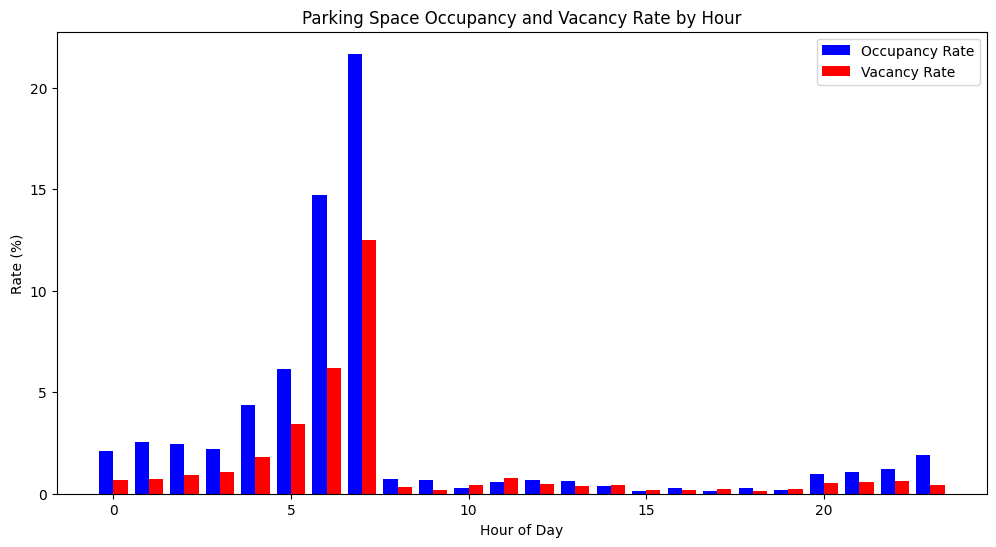

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.bar(occupancy_rate_by_hour.index - 0.2, occupancy_rate_by_hour.values, width=0.4, label='Occupancy Rate', color='b')
plt.bar(vacancy_rate_by_hour.index + 0.2, vacancy_rate_by_hour.values, width=0.4, label='Vacancy Rate', color='r')

plt.title('Parking Space Occupancy and Vacancy Rate by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Rate (%)')
plt.legend()
plt.show()


In [100]:
# Group by weekday and count the number of 'Present' statuses
occupied_by_weekday = df[df['status_description'] == 'Present'].groupby('weekday').size()

# Calculate the occupancy rate
occupancy_rate_by_weekday = (occupied_by_weekday / total_parking_spaces) * 100


In [101]:
# Group by weekday and count the number of 'Unoccupied' statuses
vacant_by_weekday = df[df['status_description'] == 'Unoccupied'].groupby('weekday').size()

# Calculate the vacancy rate
vacancy_rate_by_weekday = (vacant_by_weekday / total_parking_spaces) * 100


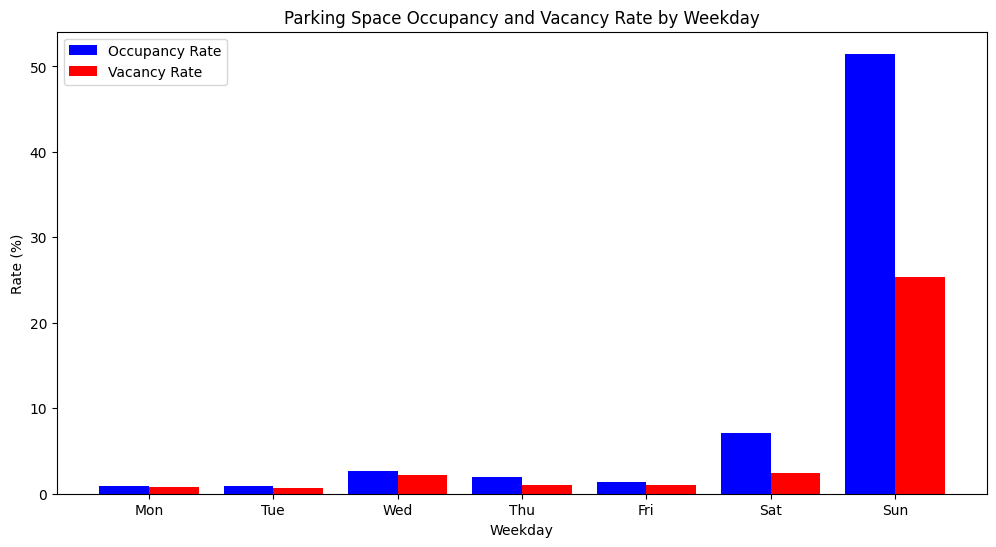

In [102]:
plt.figure(figsize=(12, 6))

plt.bar(occupancy_rate_by_weekday.index - 0.2, occupancy_rate_by_weekday.values, width=0.4, label='Occupancy Rate', color='b')
plt.bar(vacancy_rate_by_weekday.index + 0.2, vacancy_rate_by_weekday.values, width=0.4, label='Vacancy Rate', color='r')

plt.title('Parking Space Occupancy and Vacancy Rate by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Rate (%)')
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


In [37]:
# Find all duplicated rows based on all columns
duplicated_rows = parking_sensors[parking_sensors.duplicated()]

# To include the first occurrence of the duplicate in the output, you can do:
duplicated_rows_including_first = parking_sensors[parking_sensors.duplicated(keep=False)]

# Print out the duplicated rows
if duplicated_rows.empty:
    print("No exact duplicate entries found.")
else:
    print("Found exact duplicate entries:")
    print(duplicated_rows)

# Print out the duplicated rows including the first occurrence
if duplicated_rows_including_first.empty:
    print("No exact duplicate entries found including first occurrences.")
else:
    print("Found exact duplicate entries including first occurrences:")
    print(duplicated_rows_including_first)


No exact duplicate entries found.
No exact duplicate entries found including first occurrences.


In [23]:
import pandas as pd

# Assuming parking_sensors is your DataFrame
parking_sensors = parking_sensors.sort_values(by=['parkingbay_id', 'status_timestamp'])

# Calculate time difference for each row
parking_sensors['delta'] = parking_sensors.groupby('parkingbay_id')['status_timestamp'].diff()

# Determine short-term and long-term parking based on conditions
parking_sensors['parking_type'] = 'unknown'  # Default value
mask_short_term = (parking_sensors['status_description'] == 'Present') & (parking_sensors['delta'].dt.total_seconds() <= 3600)
mask_long_term = (parking_sensors['status_description'] == 'Present') & (parking_sensors['delta'].dt.total_seconds() > 3600)

parking_sensors.loc[mask_short_term, 'parking_type'] = 'short-term'
parking_sensors.loc[mask_long_term, 'parking_type'] = 'long-term'

# Count the instances
short_term_count = (parking_sensors['parking_type'] == 'short-term').sum()
long_term_count = (parking_sensors['parking_type'] == 'long-term').sum()

print(f"Short-term parking instances: {short_term_count}")
print(f"Long-term parking instances: {long_term_count}")


Short-term parking instances: 202
Long-term parking instances: 8


NameError: name 'plt' is not defined

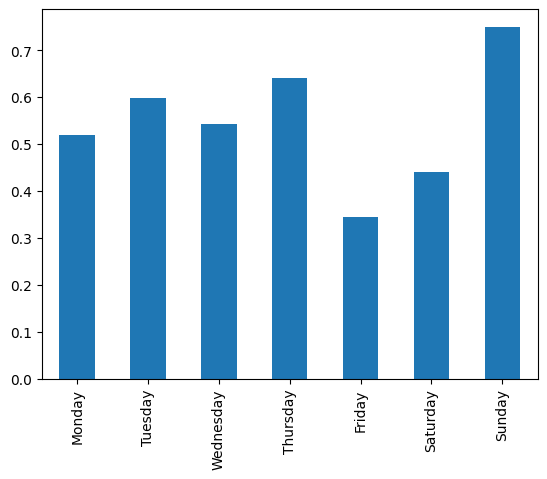

In [24]:
# Group data by day of the week and occupancy status
daily_counts = parking_sensors.groupby(parking_sensors['status_timestamp'].dt.dayofweek)['status_description'].value_counts().unstack().fillna(0)

# Define day names
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate occupancy rate for each day
daily_counts['occupancy_rate'] = daily_counts['Present'] / (daily_counts['Present'] + daily_counts['Unoccupied'])
daily_counts.index = days

# Plot the occupancy rate for each day
daily_counts['occupancy_rate'].plot(kind='bar')
plt.title('Daily Occupancy Rate')
plt.xlabel('Day of the Week')
plt.ylabel('Occupancy Rate')
plt.show()


In [25]:
unique_timestamps = parking_sensors['status_timestamp'].nunique()
print(f"Number of unique timestamps: {unique_timestamps}")


Number of unique timestamps: 4382


In [26]:
sample_bay = parking_sensors[parking_sensors['parkingbay_id'] == parking_sensors['parkingbay_id'].iloc[0]]
print(sample_bay[['status_timestamp', 'status_description']])

              status_timestamp status_description
4554 2023-09-02 06:21:19+10:00         Unoccupied


In [27]:
import numpy as np
# Calculate mean and standard deviation for the occupancy rate
mean_rate = parking_sensors.groupby(parking_sensors['status_timestamp'].dt.hour)['status_description'].value_counts(normalize=True).unstack().fillna(0)['Present'].mean()
std_rate = parking_sensors.groupby(parking_sensors['status_timestamp'].dt.hour)['status_description'].value_counts(normalize=True).unstack().fillna(0)['Present'].std()

# Calculate hourly occupancy rate
parking_sensors['hour'] = parking_sensors['status_timestamp'].dt.hour
hourly_occupancy = parking_sensors.groupby('hour')['status_description'].value_counts(normalize=True).unstack().fillna(0)['Present']

# Compute the Z-scores for each hour
z_scores = (hourly_occupancy - mean_rate) / std_rate

# Detect anomalies where |Z| > 2
anomalies = z_scores[np.abs(z_scores) > 2]

print(anomalies)


Series([], Name: Present, dtype: float64)


### There seems to be only snapshot data. Try to cluster and visualize

In [28]:
from sklearn.cluster import KMeans

# Use only occupied or unoccupied spots. Example for occupied:
occupied_spots = parking_sensors[parking_sensors['status_description'] == 'Present'][['location_lat', 'location_lon']]

kmeans = KMeans(n_clusters=5, n_init=10)  # Explicitly set n_init to 10
occupied_spots['cluster'] = kmeans.fit_predict(occupied_spots)


In [33]:
import folium
from sklearn.cluster import KMeans

# Extract lat and lon of occupied and unoccupied parking bays
data_occupied = occupied_parking[['location_lat', 'location_lon']]
data_unoccupied = unoccupied_parking[['location_lat', 'location_lon']]

# Number of clusters
clusters = 100

# Cluster occupied parking spaces
kmeans_occupied = KMeans(n_clusters=clusters)
occupied_parking['cluster'] = kmeans_occupied.fit_predict(data_occupied)

# Cluster unoccupied parking spaces
kmeans_unoccupied = KMeans(n_clusters=clusters)
unoccupied_parking['cluster'] = kmeans_unoccupied.fit_predict(data_unoccupied)

# Create a base map centered around Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Plot occupied clusters
for cluster_num in set(occupied_parking['cluster']):
    cluster_data = occupied_parking[occupied_parking['cluster'] == cluster_num]
    center = [cluster_data['location_lat'].mean(), cluster_data['location_lon'].mean()]
    folium.Circle(
        location=center,
        radius=30,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=f'Occupied Cluster {cluster_num}'
    ).add_to(m)

# Plot unoccupied clusters
for cluster_num in set(unoccupied_parking['cluster']):
    cluster_data = unoccupied_parking[unoccupied_parking['cluster'] == cluster_num]
    center = [cluster_data['location_lat'].mean(), cluster_data['location_lon'].mean()]
    folium.Circle(
        location=center,
        radius=30,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f'Unoccupied Cluster {cluster_num}'
    ).add_to(m)

m


C:\Users\asas3\.conda\envs\Python311_R361\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asas3\AppData\Local\Temp\ipykernel_23460\4141977650.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupied_parking['cluster'] = kmeans_occupied.fit_predict(data_occupied)
C:\Users\asas3\.conda\envs\Python311_R361\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, defa

### Try to extract cluster overlap as a short stop. But the time variable needs to be introduced.

In [34]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from os.path import isfile

BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
SENSOR_DATASET = 'on-street-parking-bay-sensors'
API_KEY = 'api_key=YOUR_API_KEY'
NUMBER_OF_RECORDS = 100  # Max API

def fetch_data(offset=0):
    FILTERS = f'{SENSOR_DATASET}/records?limit={NUMBER_OF_RECORDS}&offset={offset}&timezone=UTC'
    SENSOR_URL = f'{BASE_URL}{FILTERS}&{API_KEY}'
    result = requests.get(SENSOR_URL)
    result_json = result.json()
    return result_json.get('results')

def process_data(records):
    df = pd.DataFrame(records)
    df.drop(columns=['location'], inplace=True, errors='ignore')
    return df

def update_latest_parking_data():
    OFFSET = 0
    all_records = []

    while True:
        records = fetch_data(OFFSET)
        if not records:
            break
        all_records.extend(records)
        if len(records) < NUMBER_OF_RECORDS:
            break
        OFFSET += NUMBER_OF_RECORDS

    df = process_data(all_records)
    df['datetime'] = datetime.today().replace(microsecond=0) + timedelta(hours=10)  # Melbourne Time

    write_mode = 'a' if isfile('parking_sensor_data.csv') else 'w'
    df.to_csv('parking_sensor_data.csv', mode=write_mode, index=False)

# Run the function to fetch and save data
update_latest_parking_data()

In [35]:
loaded_df = pd.read_csv('parking_sensor_data.csv')

In [36]:
unique_timestamps = loaded_df['status_timestamp'].nunique()
print(f"Number of unique timestamps: {unique_timestamps}")


Number of unique timestamps: 17851


In [26]:
# Filter out spots that have always been in one state
changing_spots = parking_sensors[~parking_sensors['parkingbay_id'].isin(always_unoccupied_bays + always_present_bays)]

# Sort by parkingbay_id and status_timestamp
changing_spots = changing_spots.sort_values(by=['parkingbay_id', 'status_timestamp'])

# Calculate the duration for each parking status
changing_spots['next_timestamp'] = changing_spots.groupby('parkingbay_id')['status_timestamp'].shift(-1)
changing_spots['duration'] = changing_spots['next_timestamp'] - changing_spots['status_timestamp']

# You can now calculate, for example, the average duration of occupancy or vacancy:
average_duration = changing_spots.groupby('status_description')['duration'].mean()


In [27]:
print(f"Number of always unoccupied bays: {always_unoccupied_count}")
print(f"Number of always occupied bays: {always_present_count}")
print(f"Average duration by status: \n{average_duration}")


Number of always unoccupied bays: 2550
Number of always occupied bays: 2444
Average duration by status: 
Series([], Name: duration, dtype: timedelta64[ns])


In [11]:
print(df['status_description'].unique())

['Unoccupied' 'Present']
